In [0]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/My Drive/ML_Lab1



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/ML_Lab1


In [0]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

#                                               Lab 1 - Weightage - 3%

##  Decision Trees and Random Forests



### Dataset used : Amazon Fine food reviews.
### Maximum points in lab : 75 pts.
#### Important points to remember :
 1. Observations for the experiments done should be explained.
 2. All the code should be submitted in form of single Jupyter notebook itself.
 3. Points for each sub-section are mentioned in appropriate question.
 4. Make sure to begin early since few experiments may consume more time to run.
 5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
 6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
 7. __The lab is due on Feb 7th 11.59pm.__
 8. __The lab should be completed individually. Students are expected to follow the honor code of the class.__

### 1. Go through [scikit learn DecisionTree documentation] : https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
### Explain briefly various options available in corresponding DecisionTree classifier in scikit-learn package. [5 pts] 




# Add your description of the function here.

### 1. criterion : 
>It specifies the splitting function to be used. 'gini', is the default splitting criteria. We can set the criterion to 'entropy', if we wish to use information gain as the measure of splitting quality.

### 2. max_depth : 
>The maximum depth the tree can grow. If not set, then nodes expand till all leaves are pure or until all leaves contains less than min_samples_split samples.

### 3. min_samples_split :
>The minimum number of samples required to split an internal node. The default value of min_samples_split is 2. 

### 4. min_samples_leaf : 
>The minimum number of samples required to be a leaf node. The default value of min_samples_leaf is 1.A split will consider valid only if it leaves atleast min_samples_leaf training samples in each left and right brach.


### 5. min_impurity_decrease 
> A node will be split if this split decreases the impurity by atleast this value.  


### 6. class_weight 
> This parameter us used when we want to assign some weight to the classes. Default weight 1 is assinged to all the class otherwise.

### 7. max_features 
> The number of features to consider when looking for the best split. 
By default sqrt(len(features)) is used for training.

### 8. max_leaf_nodes
> In the final tree, only best max_leaf_nodes will be taken and others will be rejected. Default value is 'None', which means reject none of the leaf nodes.  

### 9. splitter
> The strategy used to choose the split at each node. Supported strategies are 'best' to choose the best split and 'random' to choose the best random split.

### 10. min_weight_fraction_leaf 
> The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

### 11. random_state
> Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.

Other Parameters are presort, ccp_alpha.

----
  
  

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5 
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

Out of above attributes we will consider <strong>Score as Y or Output variable</strong>, and  <strong>Summary as X or data points.</strong>



### Import Libraries

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import timeit
from sklearn.metrics import accuracy_score
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn import model_selection
import pickle
import sqlite3
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt') # Required when running in Google Collab 

[nltk_data] Downloading package punkt to /home/jeetu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 2.  Dataset loading, train test split, print two data points after converting score column into positive, negative class - [5 pts]
#### steps :
 Use score column as the output variable and Summary as the input variable
 1. Convert score column as score > 3 - positive class and score <=3 as negative class.
 2. Now define train test split as 0.25.

In [0]:
# connecting to the dataset server to download the amazon fine foods dataset. Do not make any changes to the code below
con = sqlite3.connect('datasets/amazon-fine-food-reviews/database.sqlite')
messages = pd.read_sql_query("""
SELECT Score, Summary
FROM Reviews
""", con)

# the parition function applied threshold on the rating to label a review as 'positive' or 'negative'.
def partition(x):
    if(x>3):
        return 1
    else:
        return 0
   # insert your code here

Score = messages['Score']
Score = Score.map(partition)
Summary = messages['Summary']

# call the function to create the train and test splits according to the ratio 75:25
# uncomment and complete the line below

train_X, test_X, train_y, test_y = train_test_split(Summary, Score, test_size=0.25  )

# print an example of the dataset after the labeling process
print(messages.head(2))
tmp = messages
tmp['Score'] = tmp['Score'].map(partition)
print(tmp.head(2))

   Score                Summary
0      5  Good Quality Dog Food
1      1      Not as Advertised
   Score                Summary
0      1  Good Quality Dog Food
1      0      Not as Advertised


In [0]:
# do not change make any changes to the code below. This part of the
# code removes stop words and transforms all the words and letters
# into a uniform representation. Further, it also removes punctuation
# marks.
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

corpus = []
count_train_x=0
for text in train_X:
    count_train_x=count_train_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)
        
count_test_x=0
test_set=[]
for text in test_X:
    count_test_x=count_test_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
X_test_counts = count_vect.transform(test_set)

### 4. Print before and after using data pre-processing for five data points - [5 pts]
For example, following are some outputs that we were able to generate

 ID | Before preprocessing | After preprocessing 
 -|-|-
 45612 | Good Strong Flavor|good strong flavor 
 180139 | GREAT SIDE DISH | great side dish 
 541273 | Its agar | it agar 
 102774 | Great product! | great product
 447382 | Love them | love them 

In [0]:
# Data before the processing step is stored in the variable train_X 
# and the processed data is present in corpus. Print randomly 5 
# instances to check the success of the processing step. 
# insert your code here.
tempDictonary = {"Before Processing" : train_X , 'After preprocessing' : corpus}
temp = pd.DataFrame(data=tempDictonary)
print(temp.head())

         Before Processing After preprocessing
503189        Great Stuff!         great stuff
204694             perfect             perfect
317540  Nice Robust flavor  nice robust flavor
260838     Soda Stream Mix     soda stream mix
277827  Love these sprouts   love these sprout


In [0]:

# yValues = train_y.values
# print(train_y[0:15])
# # print(X_train_counts[0:10])
# for i in range(0,15):
#     print(yValues[i])

### 5. Build a basic decision tree choosing appropriate min_samples_leaf parameter so that tree fits in output cell using Graphviz package [5 pts]
Use the decision tree classifier from the sklearn library to learn a decision tree from the training dataet. For now, we would like to only visualize the tree to ensure that we are calling the correct function. Set the min_samples_leaf parameter to a high value (>15000) for learning the tree. This tree will not be accurate, but will be big enough for us to visualize it. Identify the functions in the tree package that will help to visualize the tree and plot it. Below is a sample tree generated when mi_samples_leaf was set to 20000
![tree.png](attachment:tree.png)

Accuracy :  0.8037411455645729


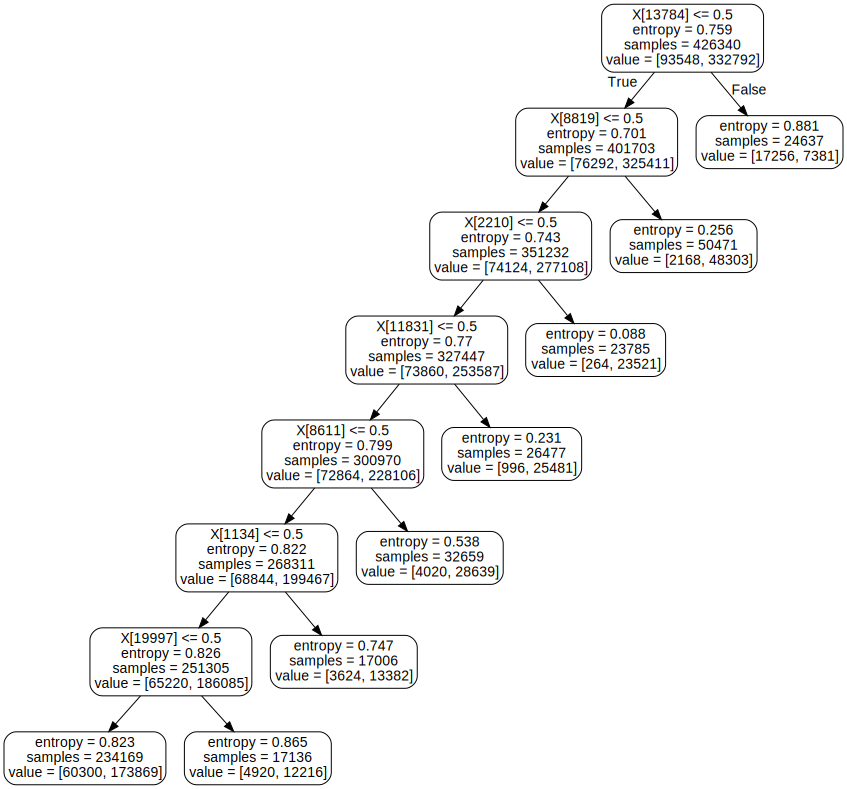

In [0]:
from graphviz import Source
from sklearn import tree
clf = tree.DecisionTreeClassifier(  criterion = "entropy"  , min_samples_leaf= 16000)
clf.fit( X_train_counts, train_y)
print("Accuracy : " , accuracy_score(train_y , clf.predict(X_train_counts)))
Source( tree.export_graphviz(clf, out_file=None, rounded= True, special_characters = False ))
# insert your code here

In [0]:
def plot_accuracy(test_accuracy_list,train_accuracy_list, x_axis_values ,xlabel, ylabel, title):
    fig = plt.figure()
    ax=fig.add_subplot(111)
    plt.title( title , fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    ax.plot(x_axis_values, test_accuracy_list , marker = "o" , label="Test")
    ax.plot(x_axis_values, train_accuracy_list , marker ="o" , label="Train")
    plt.legend(loc=2)
    plt.show()    
    # insert your code here
    


### 6. Experiments with different tree parameters
#### a. minimum number of samples in a node.  [5 pts]
By now we should have all the code in place for learning accurate decision trees. As we discussed in the class, one method to prevent overfitting a decision tree is to put constraints on the number of samples assigned to a split node during training. We had used this parameter to learn extremely short decision trees in the previous step. Let us now vary this parameter and investigate the impact on the train and test accuracy of the model. 
The first part of the code should loop around different values for min_samples_split and save the resulting train and test accuracy. In the second part, plot a graph with x-axis being the number of samples in the node and accuracy being the y axis. Plot both the train and test accuracies in the same figure. Write a generic function for the plotting as we will use it later for other visualizations.

[0.97141952432331, 0.9524792419195947, 0.9431392785101093, 0.933330205938922]
[0.9163207002828715, 0.9111980522678976, 0.907961214236458, 0.9043866191930422]


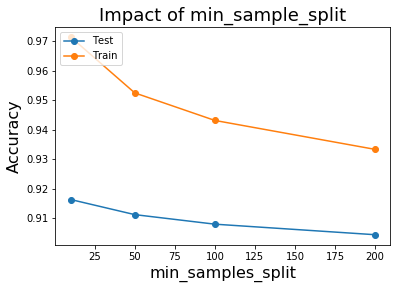

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
min_samples_split = [10,50,100,200]

for i in min_samples_split:
    # Build Tree 
    clf = tree.DecisionTreeClassifier( min_samples_split= i)
    clf.fit(X_train_counts, train_y) # Fit Tree

    #Accuracy
    train_accuracy = accuracy_score( train_y , clf.predict( X_train_counts ))
    test_accuracy = accuracy_score( test_y , clf.predict( X_test_counts ))
    
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)
    # insert your code here

print(train_accuracy_list)
print(test_accuracy_list)

def plot_accuracy(test_accuracy_list,train_accuracy_list, x_axis_values ,xlabel, ylabel, title):
    fig = plt.figure()
    ax=fig.add_subplot(111)
    plt.title( title , fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    ax.plot(x_axis_values, test_accuracy_list , marker = "o" , label="Test")
    ax.plot(x_axis_values, train_accuracy_list , marker ="o" , label="Train")
    plt.legend(loc=2)
    plt.show()    
    # insert your code here
    
plot_accuracy(test_accuracy_list,train_accuracy_list, min_samples_split, "min_samples_split", "Accuracy", "Impact of min_sample_split")

## Observtion :
On increasing the min samples split, is the measure of whether grow the tree furtherfrom a particular node or not. On increasing this value, depth of tree decreases. So, we are not able to fit a more complicated function, hence training accuracy decreases. And test accuracy also decreases in our case, as due to not fitting of complex function which were essential for classification of the data. 

#### b. maximum number of leaf nodes in the tree [5 pts]
The tree learner has a parameter max_leaf_nodes. Discuss the role of this parameter during the tree learning. Investigate the impact of this parameter on the train and test accuracy.

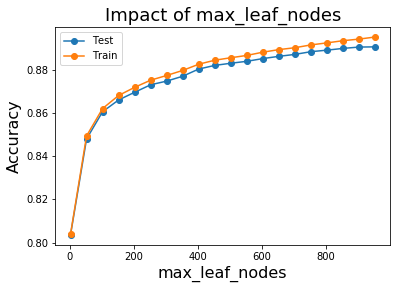

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
max_leaf_nodes=1000
step_size_2=50
for i in range(2, max_leaf_nodes,step_size_2):
    # insert your code here
    clf = tree.DecisionTreeClassifier( max_leaf_nodes= i)
    clf.fit(X_train_counts, train_y) # Fit Tree

    #Accuracy
    train_accuracy = accuracy_score( train_y , clf.predict( X_train_counts ))
    test_accuracy = accuracy_score( test_y , clf.predict( X_test_counts ))
    
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)

x_axis_values = list(range(2, max_leaf_nodes,step_size_2))
plot_accuracy(test_accuracy_list, train_accuracy_list, x_axis_values ,"max_leaf_nodes", "Accuracy", "Impact of max_leaf_nodes")

## Observarion 
Max leaf nodes denotes the maximum number of leaf nodes that the tree can hold. On increasing the number of leaf nodes, our training accuracy increases as we are able to fit more complex functions. Also, our test accuracy increased, as more complex function will catch the charactestics of instance space essential for classification. However, on increasing this too much, may overfit the model, but this didn't happen in our case.

#### c. splitting criteria [5 pts]
Identify the default splitting critera and experiment with other criterion implemented in the tree package. Report the accuracy on the test dataset as well as other parameters chracterizing the learned decision tree. 

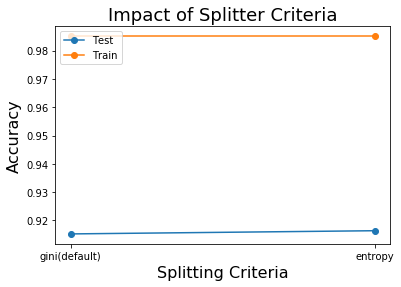

Default Criterion - Gini

Criterion - gini :
	 Train Accuracy : 0.9850682553830277 	Test Accuracy: 0.9152300265983647
Criterion - entropy :
	Train Accuracy : 0.9850682553830277 	Test Accuracy: 0.9163629199093686
Training Time Gini :  165.0327480550004
Training Time Entropy :  139.68717302200093


In [0]:
test_accuracy_list=[]
train_accuracy_list=[]

time_taken = []
splitting_criteria = ["gini","entropy"]
for i in range(2):
    # insert your code here
    clf = tree.DecisionTreeClassifier(criterion=splitting_criteria[i])
    start = timeit.default_timer()
    clf.fit(X_train_counts, train_y) # Fit Tree
    stop = timeit.default_timer()
    

    #Accuracy
    train_accuracy = accuracy_score( train_y , clf.predict( X_train_counts ))
    test_accuracy = accuracy_score( test_y , clf.predict( X_test_counts ))
    time_taken.append(stop-start)
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)

x_axis_values = ["gini(default)", "entropy"]
plot_accuracy(test_accuracy_list, train_accuracy_list, x_axis_values , "Splitting Criteria", "Accuracy", "Impact of Splitter Criteria")
print ("Default Criterion - Gini\n")
print ("Criterion - gini :\n\t Train Accuracy : {} \tTest Accuracy: {}".format(train_accuracy_list[0] , test_accuracy_list[0]))
print ("Criterion - entropy :\n\tTrain Accuracy : {} \tTest Accuracy: {}".format(train_accuracy_list[1] , test_accuracy_list[1]))
print("Training Time Gini : ", time_taken[0])
print("Training Time Entropy : ", time_taken[1])

### Obseration :
Criteria - function to measure the quality of a split. Gini impurity and Information Gain Entropy are pretty much the same. And people do use the values interchangeably. However gini is faster than entropy beacuse we do not need to compute logarithmic function, which is difficult to calculate computationally. 

#### d. depth of the decision tree [5 pts]
Investigate the impact of depth of the decision tree on the test accuracy

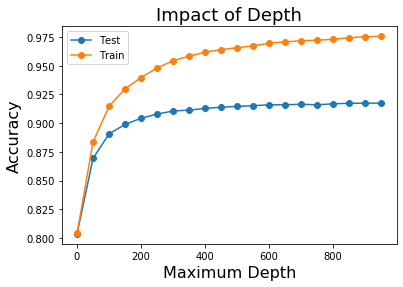

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
maximum_depth=1000
step_size=50
for i in range(1, maximum_depth,step_size):
    # insert your code here
    clf = tree.DecisionTreeClassifier(max_depth= i)
    clf.fit(X_train_counts, train_y) # Fit Tree

    #Accuracy
    train_accuracy = accuracy_score( train_y , clf.predict( X_train_counts ))
    test_accuracy = accuracy_score( test_y , clf.predict( X_test_counts ))
    
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)

x_axis_values = list(range(1, maximum_depth,step_size))
plot_accuracy(test_accuracy_list, train_accuracy_list, x_axis_values , "Maximum Depth", "Accuracy", "Impact of Depth")

### Observation 
Tree depth determines how flexible the model is. A deeper tree can fit more complicated functions. Therefore, increasing tree depth should increase performance on the training set. But, increased flexibility also gives greater ability to overfit the data, and generalization performance may suffer if depth is increased too far. But however, it does not happen in our case as we haven't decreased the depth so much.

### 7. Random forest
Now, let us explore an ensemble of decision trees - random forest. Fortunately, sklearn has an ensemble library containing the random forest classifier. Let us learn a random forest using both instance and feature bagging independently.

----
#### a. briefly describe the input parameters to the random forest classifier [5 pts]

## Input Parameters of Random Forest:

### 1. n_estimators : 
>It sets the numner of trees present in the forest. Default value of n_estimator is 100.

### 2. criterion : 
>It specifies the splitting function to be used. 'gini', is the default splitting criteria. We can set the criterion to 'entropy', if we wish to use information gain as the measure of splitting quality.

### 3. max_depth : 
>The maximum depth the tree can grow. If not set, then nodes expand till all leaves are pure or until all leaves contains less than min_samples_split samples.

### 4. min_samples_split :
>The minimum number of samples required to split an internal node. The default value of min_samples_split is 2. 

### 5. min_samples_leaf : 
>The minimum number of samples required to be a leaf node. The default value of min_samples_leaf is 1.A split will consider valid only if it leaves atleast min_samples_leaf training samples in each left and right brach.

### 6. max_samples 
>The number of samples to draw from the input to train the classifier. By default it draws input_size samples for training. 

### 7. n_jobs 
> The number of jobs to run in parallel. By default, one job is run. We can set this value to -1 to make use of all available processors. 

### 8. bootstrap 
>It specifies whether we want to use bootstrap the samples for building the tree or not. If set to false , the whole dataset is used to build each tree.

### 9. min_impurity_decrease 
> A node will be split if this split decreases the impurity by atleast this value.  


### 10. class_weight 
> This parameter us used when we want to assign some weight to the classes. Default weight 1 is assinged to all the class otherwise.

### 11. max_features 
> The number of features to consider when looking for the best split. 
By default sqrt(len(features)) is used for training.

### 12. max_leaf_nodes
> In the final tree, only best max_leaf_nodes will be taken and others will be rejected. Default value is 'None', which means reject none of the leaf nodes.  

Other parameters are random_state, ccp_alpha, warm_start, verbose.

----
  
  
  
  
  

#### b. instance bagging [10 pts]
As discussed in the class, instances are sampled with replacement to create multiple synthetic training sets. Decision tree is learned for every training set. An ensemble strategy (majority voting) is applied on the output of all the trees for a test instance. Let us vary the number of instances in each bag to learn the random forest and check if there is impact on the performance of the ensemble. 

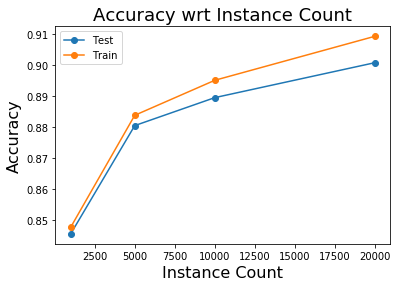

In [0]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import random
test_accuracy_list=[]
train_accuracy_list=[]
number_of_instances = [1000,5000,10000,20000]


for i in number_of_instances:
    clf = RandomForestClassifier( criterion = "entropy"  , n_jobs = -1 , bootstrap = True, max_samples = i)
    clf.fit(X_train_counts, train_y)

    train_accuracy = accuracy_score( train_y , clf.predict( X_train_counts ))
    test_accuracy = accuracy_score( test_y , clf.predict( X_test_counts ))
    
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)
    # insert your code here
    # clf = RandomForestClassifier(nu)

plot_accuracy(test_accuracy_list, train_accuracy_list, number_of_instances, "Instance Count", "Accuracy", "Accuracy wrt Instance Count")

### Observation 

On increasing the max number of samples used for training, our train accuracy goes higher (Note : Our data is less noisy), so the effect of outliers will get dampened. Test accuracy also increases as each tree is trained with more number of sample, i.e trees are more stronger in their capability of classifying the data.

#### c. feature bagging [10 pts]
For performing feature bagging, we sample a subset of features from the initial set of features. A decision tree is learned for every training set that contains all the instances characterized by a subset of features. An ensemble strategy is applied for classifying a test instance. In this experiment we will investigate the impact of varying the number of features bagged on the test accuracy.

Defualt number of Features = sqrt (n_features)


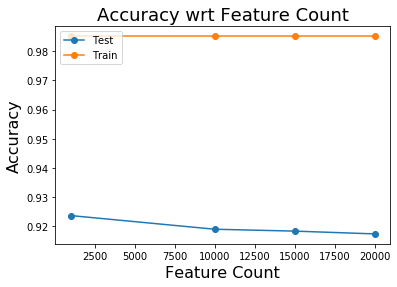

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
number_of_features = [1000,10000,15000,20000]

# By Defaul number of features = sqrt (sample size)
#Bootstrap = False, to make use entire data for training 
for i in number_of_features:
    clf = RandomForestClassifier( criterion = "entropy" , n_estimators =20 , n_jobs = -1 , bootstrap = False , max_features = i)
    clf.fit(X_train_counts, train_y)

    train_accuracy = accuracy_score( train_y , clf.predict( X_train_counts ))
    test_accuracy = accuracy_score( test_y , clf.predict( X_test_counts ))
    
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)
    # insert your code here

    
print ("Defualt number of Features = sqrt (n_features)")
plot_accuracy(test_accuracy_list ,train_accuracy_list, number_of_features, "Feature Count", "Accuracy", "Accuracy wrt Feature Count")

## Observation : 
max_features represents the number of features to consider when looking for the best split. If we increase the max_feature parameters too much, then it will result in overfitting the data as all the features will be inspected before making the split. However, if we decrease it too much, it will result in biasing, because the model will be too simple to capture the realtion between inputs and outputs. It is suggested to use sqrt(n_sample) i.e 1000 in our case to get the best training accuracy. The train accuracy remians highest and almost same for all the cases, as our model is already overfitted and connot go any higher. 

#### d. number of trees in the forest [10 pts]
Finally let us vary the number of trees in the random forest. We will use the default random forest classifier and only vary the number of trees learned in the ensemble. Again make your observations on the test accuracy as the number of trees are varied.

Default Number of trees = 100


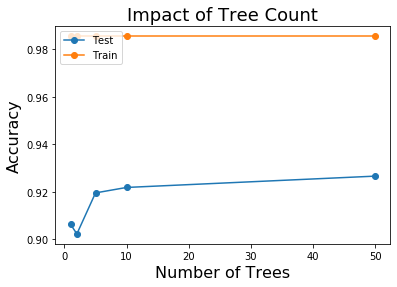

In [0]:
test_accuracy_list=[]
train_accuracy_list=[]
number_of_trees = [1,2,5,10,50]

# Sub Sample Size = Original Input Size 
# Bootrstap = False, To forece use entire dataset to build each tree 
for i in number_of_trees:
    clf = RandomForestClassifier(n_estimators =  i , criterion = "entropy"  , n_jobs = -1 , bootstrap = False)
    clf.fit(X_train_counts, train_y)

    train_accuracy = accuracy_score( train_y , clf.predict( X_train_counts ))
    test_accuracy = accuracy_score( test_y , clf.predict( X_test_counts ))
    
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)
    
print("Default Number of trees = 100")
plot_accuracy(test_accuracy_list ,train_accuracy_list, number_of_trees,  "Number of Trees", "Accuracy", "Impact of Tree Count")

### Observation 
On increasing the number of trees in forest, the accuracy increases, and finally it gets plateaud. Because the error caused by a overfitting/underfitting of a single tree gets averaged out. It decreased for n=2, as in case of conflicting majority, both trees have voted differently, hence random class was picked as answer.